<a href="https://colab.research.google.com/github/auroramugnai/Naimark-Dilations/blob/main/DilationWithRankTwoMeasurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We refer to Lemma B.3 in the Appendix of https://arxiv.org/abs/2410.16447.
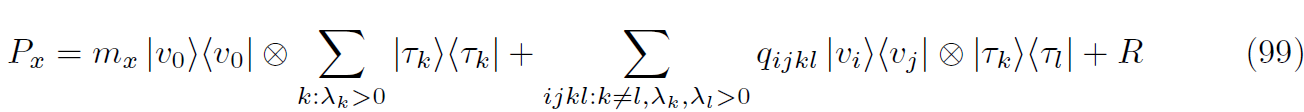


In [5]:
!pip install picos

In [ ]:
import picos as pic
import numpy as np
from picos.modeling.problem import Problem

In [9]:
dim = 4
problem = Problem()
PiSA = pic.SymmetricVariable('PiSA', shape=(dim, dim))
problem.add_constraint(PiSA >> 0)  # positive semidefinite constraint

# Bit structure:
# First bit  --> System
# Second bit --> Ancilla
#
# On the diagonal of the Ancilla, we want to set to zero the coefficients of
# the off-diagonal terms of the System: |00><10|, |10><00|, |01><11|, |11><01|.
#
# Indices mapping:
#       0  1  2  3
#       00 01 10 11
# 0 00  *  *  0  *
# 1 01  *  *  *  0
# 2 10  0  *  *  *
# 3 11  *  0  *  *
problem.add_constraint(PiSA[0,2] == 0)
problem.add_constraint(PiSA[2,0] == 0)
problem.add_constraint(PiSA[1,3] == 0)
problem.add_constraint(PiSA[3,1] == 0)

<1×1 Affine Constraint: PiSA[3,1] = 0>

This step is optional:

In [7]:
# Additional constraints to impose that the measurement M_S is rank one
# and equal to |0><0|. Specifically, we force the coefficients of |10><10| and |11><11| to zero.
# These additional zeros are marked as 'O':
#
#       0  1  2  3
#       00 01 10 11
# 0 00  *  *  0  *
# 1 01  *  *  *  0
# 2 10  0  *  O  *
# 3 11  *  0  *  O
#
# Note: The South-East 2x2 block has det < 0, hence we already see that the matrix cannot be PSD!
problem.add_constraint(PiSA[2,2] == 0)
problem.add_constraint(PiSA[3,3] == 0)

<1×1 Affine Constraint: PiSA[3,3] = 0>

In [14]:
# Constraint to ensure that the coefficient d0101 associated with |0>|0><1|<1| is positive.
# Setting it explicitly:
#
#       0  1  2  3
#       00 01 10 11
# 0 00  *  *  0  p
# 1 01  *  *  *  0
# 2 10  0  *  O  *
# 3 11  p  0  *  O
#
# Where p = 0.1
problem.add_constraint(PiSA[0,3] >= 0.1)  # p = 0.1

# Set a dummy objective (maximize a constant) just to solve the feasibility problem.
one = pic.Constant('1', 1)
problem.set_objective('max', one)

problem.solve(verbosity=True)
result = np.matrix(PiSA.value_as_matrix)
print(result)

            PICOS 2.6.1            
Problem type: Semidefinite Program.
Reusing strategy:
  1. ExtraOptions
  2. CVXOPTSolver
Updating ExtraOptions.
Updating the CVXOPT problem instance.
Update failed: Not supported with CVXOPT.
Rebuilding the CVXOPT problem instance.
Starting solution search.
-----------------------------------
 Python Convex Optimization Solver 
    via internal CONELP solver     
-----------------------------------
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  2.0000e-01  6e+00  3e+00  2e+00  1e+00
 1:  0.0000e+00  4.4069e-02  8e-01  3e-01  3e-01  1e-01
 2:  0.0000e+00  4.4135e-04  9e-03  3e-03  3e-03  1e-03
 3:  0.0000e+00  4.4136e-06  9e-05  3e-05  3e-05  1e-05
 4:  0.0000e+00  4.4136e-08  9e-07  3e-07  3e-07  1e-07
 5:  0.0000e+00  4.4136e-10  9e-09  3e-09  3e-09  1e-09
Optimal solution found.
------------[ CVXOPT ]-------------
Solver claims optimal solution for feasible problem.
Applying the solution.
Applied solution is primal feasible

<ipython-input-14-e9833dc59568>:18: DeprecationWarning: Option 'verbose' is deprecated, use 'verbosity'.
  problem.solve(verbose=True)


# Plot

In [12]:
from matplotlib import pyplot as plt

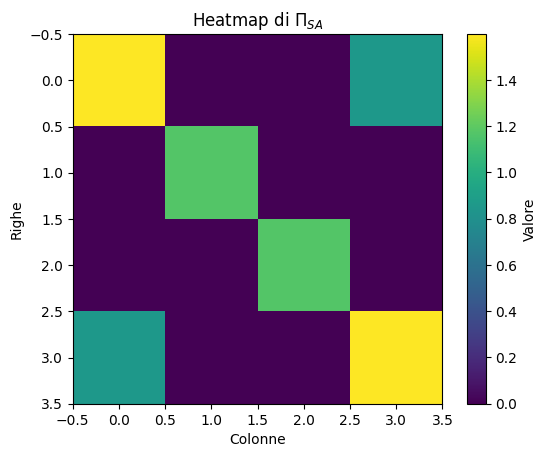

In [16]:
plt.imshow(result, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Valore')
plt.title('Heatmap di $\Pi_{SA}$')
plt.xlabel('Colonne')
plt.ylabel('Righe')
plt.show()